In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import dask.dataframe as dd

column_names = ["Inode (file unique ID)",
"KB Allocated",
"File Size",
"Creation Time in days from today",
"Change Time in days from today",
"Modification time in days from today",
"Acces time in days from today",
"GID numeric ID for the group owner of the file",
"UID numeric ID for the owner of the file"]
ddf = dd.read_csv("/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23",header=None, names = column_names, sep=" ")


In [3]:
ddf.head()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
0,100663296,0,8,1447,1447,3131,1447,2035,762231
1,100663297,0,188,1447,1447,1937,1447,2010,614955
2,100663301,0,567,1447,1447,3142,1447,2035,762231
3,100663304,0,87,1447,1447,3142,1447,2035,762231
4,100663306,0,1689,1447,1447,1937,1447,2010,614955


In [4]:
ddf.describe()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
npartitions=1,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...


In [5]:
# print(ddf.describe().compute())
# print(ddf.corr().compute())

In [17]:
# Sample approximately 10% of the rows without replacement
approx_total_rows = 14e6  # Approximate total number of rows in ddf
desired_sample_size = 100
frac = desired_sample_size / approx_total_rows

sampled_ddf = ddf.sample(frac=frac, replace=False)

# To compute and get the sampled data as a pandas dataframe (be cautious with memory usage)
sampled_pdf = sampled_ddf.compute()
sampled_pdf

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
1158460,102064019,128,104118,1447,1093,2073,1050,2022,500120
719336,101520492,0,185,1447,1447,2324,1447,2003,785573
1176634,102086370,0,572,1447,1447,2527,1446,2003,785573
1096346,101986637,0,0,1447,1093,2105,1506,2022,500120
996477,101859646,64,43401,1447,1447,2080,702,2003,785573
...,...,...,...,...,...,...,...,...,...
1005098,227755704462,64,13132,839,839,1142,467,2023,760443
21017,227754256770,2368,2359670,839,839,2779,471,2008,804448
774158,227755356763,0,145,839,839,1904,467,2023,760443
207796,227754525473,0,3296,839,839,1716,469,2008,804448


In [21]:
sampled_pdf.corr()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
Inode (file unique ID),1.000000,-0.005565,-0.005199,0.027613,0.063651,0.286425,-0.201372,-0.143706,-0.041120
KB Allocated,-0.005565,1.000000,0.999918,-0.016159,-0.015844,-0.012243,-0.013139,-0.005312,-0.001288
File Size,-0.005199,0.999918,1.000000,-0.016530,-0.015899,-0.011946,-0.013314,-0.006200,-0.001199
Creation Time in days from today,0.027613,-0.016159,-0.016530,1.000000,0.939138,0.597836,0.854099,-0.074456,0.017348
Change Time in days from today,0.063651,-0.015844,-0.015899,0.939138,1.000000,0.599564,0.797669,-0.123163,0.024700
Modification time in days from today,0.286425,-0.012243,-0.011946,0.597836,0.599564,1.000000,0.405672,-0.262979,0.006147
Acces time in days from today,-0.201372,-0.013139,-0.013314,0.854099,0.797669,0.405672,1.000000,0.024592,0.030841
GID numeric ID for the group owner of the file,-0.143706,-0.005312,-0.006200,-0.074456,-0.123163,-0.262979,0.024592,1.000000,-0.098690
UID numeric ID for the owner of the file,-0.041120,-0.001288,-0.001199,0.017348,0.024700,0.006147,0.030841,-0.098690,1.000000


array([[<Axes: xlabel='Inode (file unique ID)', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='KB Allocated', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='File Size', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='Creation Time in days from today', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='Change Time in days from today', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='Modification time in days from today', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='Acces time in days from today', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='GID numeric ID for the group owner of the file', ylabel='Inode (file unique ID)'>,
        <Axes: xlabel='UID numeric ID for the owner of the file', ylabel='Inode (file unique ID)'>],
       [<Axes: xlabel='Inode (file unique ID)', ylabel='KB Allocated'>,
        <Axes: xlabel='KB Allocated', ylabel='KB Allocated'>,
        <Axes: xlabel='File Size', ylabel='KB Allocated'>,
        <A

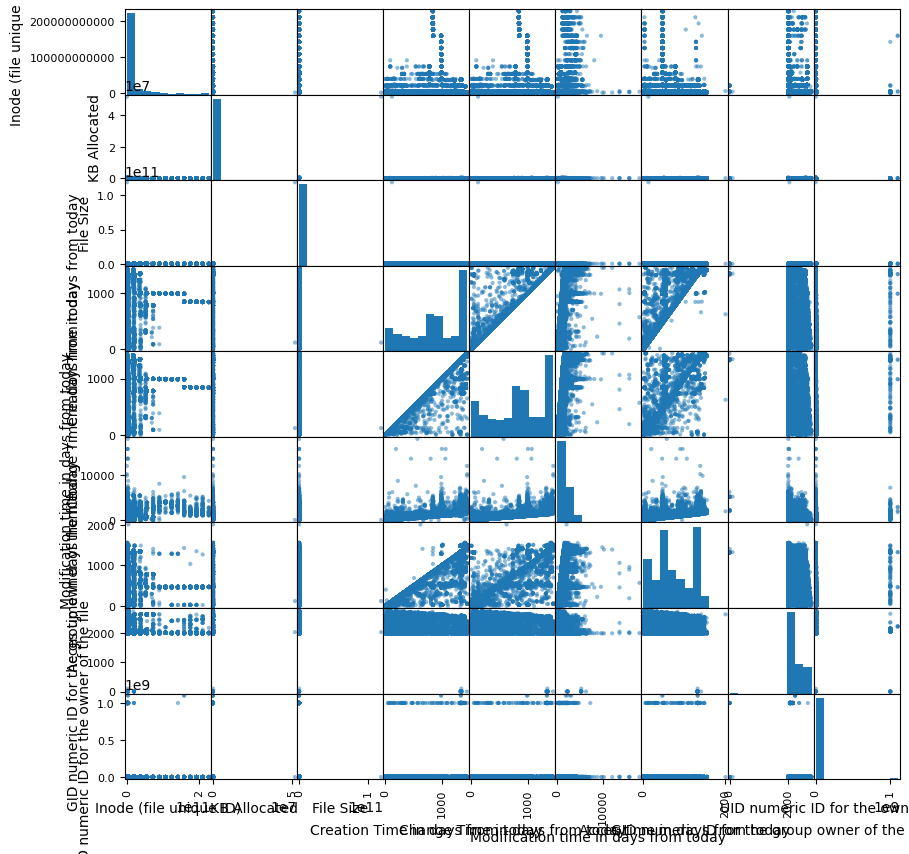

In [23]:
pd.plotting.scatter_matrix(sampled_pdf, figsize=(10,10))